<a href="https://colab.research.google.com/github/josephychin/forest-fires/blob/main/Project_2_Part_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 2 - Part 5

This is your last week to work on your second project! Next week during our live class, you will be giving a short (5 minute) presentation about your project. You need to be ready to present the first day of class next week (the order of presentations will be randomly assigned). Your presentation should include background information about your project, information about your data, visualizations, modeling techniques, and results/conclusions/recommendations.

Your task for this week is to complete your project and prepare your presentation. Make sure to include your presentation slide deck on your GitHub repository for your project. Submit the link to your project GitHub repository with your completed project.

Source: https://archive.ics.uci.edu/ml/datasets/Forest+Fires

[Cortez and Morais, 2007] P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, Guimarães, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9.

In [Cortez and Morais, 2007], the output 'area' was first transformed with a ln(x+1) function.
Then, several Data Mining methods were applied. After fitting the models, the outputs were
post-processed with the inverse of the ln(x+1) transform. Four different input setups were
used. The experiments were conducted using a 10-fold (cross-validation) x 30 runs. Two
regression metrics were measured: MAD and RMSE. A Gaussian support vector machine (SVM) fed
with only 4 direct weather conditions (temp, RH, wind and rain) obtained the best MAD value:
12.71 +- 0.01 (mean and confidence interval within 95% using a t-student distribution). The
best RMSE was attained by the naive mean predictor. An analysis to the regression error curve
(REC) shows that the SVM model predicts more examples within a lower admitted error. In effect,
the SVM model predicts better small fires, which are the majority.

X - x-axis spatial coordinate within the Montesinho park map: 1 to 9

Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9

month - month of the year: 'jan' to 'dec'

day - day of the week: 'mon' to 'sun'

FFMC - FFMC (Fine Fuel Moisture Code) index from the FWI system: 18.7 to 96.20

DMC - DMC (Duff Moisture Code) index from the 
FWI system: 1.1 to 291.3

DC - DC (Drought Code) index from the FWI system: 7.9 to 860.6

ISI - (Initial Spead Index) ISI index from the FWI system: 0.0 to 56.10

temp - temperature in Celsius degrees: 2.2 to 33.30

RH - relative humidity in %: 15.0 to 100

wind - wind speed in km/h: 0.40 to 9.40

rain - outside rain in mm/m2 : 0.0 to 6.4

area - the burned area of the forest (in ha): 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/PandasForDataManipulation/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
df.shape

(517, 13)

In [ ]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [ ]:
df.isnull().count()

X        517
Y        517
month    517
day      517
FFMC     517
DMC      517
DC       517
ISI      517
temp     517
RH       517
wind     517
rain     517
area     517
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb792ecc990>,
      dtype=object)

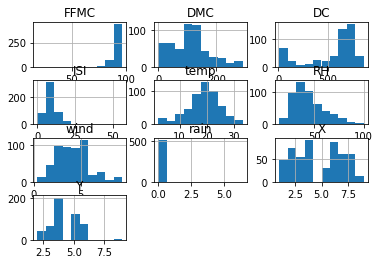

In [ ]:
df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'X', 'Y']].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Fires in Months')]

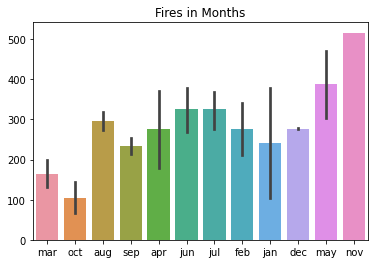

In [ ]:
# plt.bar(df['month'].values, df['month'].index)
sns.barplot(df['month'].values, df['month'].index).set(title='Fires in Months')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Fires in Days')]

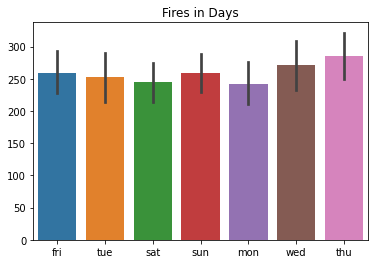

In [ ]:
# plt.bar(df['day'].values, df['day'].index)
sns.barplot(df['day'].values, df['day'].index).set(title='Fires in Days')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


{'boxes': [<matplotlib.lines.Line2D at 0x7fb78398ef10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb7839abf90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb783c27fd0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb783c27a90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb7839ab510>,
  <matplotlib.lines.Line2D at 0x7fb783b54e10>]}

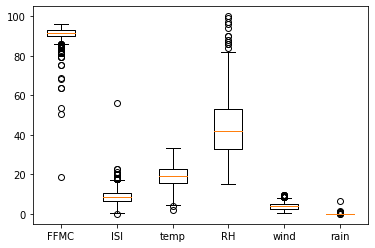

In [ ]:
plt.boxplot([df['FFMC'], df['ISI'], df['temp'], df['RH'], df['wind'], df['rain']], labels = ['FFMC', 'ISI', 'temp', 'RH', 'wind', 'rain'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb783add610>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb783ae1690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb783aea6d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb783aea190>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb783addbd0>,
  <matplotlib.lines.Line2D at 0x7fb783a85990>]}

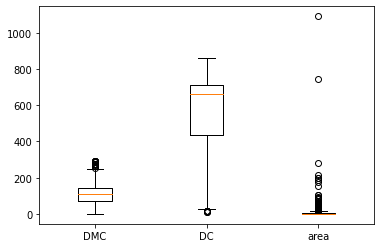

In [ ]:
plt.boxplot([df['DMC'], df['DC'], df['area']], labels = ['DMC', 'DC', 'area'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb7839fb5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb783a01650>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb783a0a690>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb783a0a150>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb7839fbb90>,
  <matplotlib.lines.Line2D at 0x7fb783a12590>]}

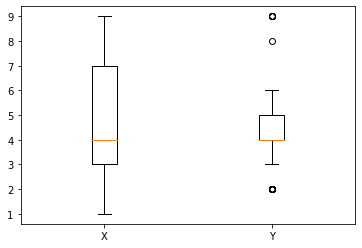

In [ ]:
plt.boxplot([df['X'], df['Y']], labels = ['X', 'Y'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
X = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'X', 'Y']]

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
df['cluster'] = kmeans.labels_

Text(0.5, 1.0, 'Clusters of Fires')

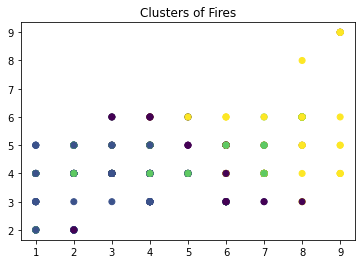

In [ ]:
plt.scatter(df['X'], df['Y'], c = df['cluster'])
plt.title('Clusters of Fires')


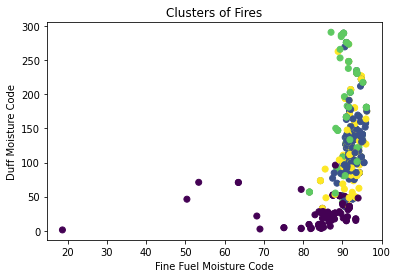

In [ ]:
plt.scatter(df['FFMC'], df['DMC'], c = df['cluster'])
plt.xlabel('Fine Fuel Moisture Code')
plt.ylabel('Duff Moisture Code')
plt.title('Clusters of Fires');

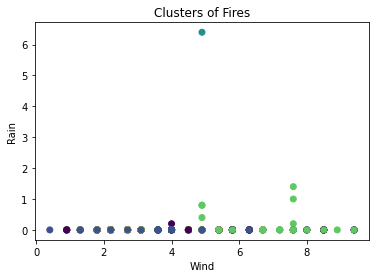

In [ ]:
plt.scatter(df['wind'], df['rain'], c = df['cluster'])
plt.xlabel('Wind')
plt.ylabel('Rain')
plt.title('Clusters of Fires');

In [ ]:
df['cluster'].value_counts()

1    198
4    125
0    108
3     85
2      1
Name: cluster, dtype: int64

In [ ]:
seg1 = df[df['cluster'] == 0]
seg2 = df[df['cluster'] == 1]
seg3 = df[df['cluster'] == 2]
seg4 = df[df['cluster'] == 3]
seg5 = df[df['cluster'] == 4]

In [ ]:
fire_segs = [seg1, seg2, seg3, seg4, seg5]
for segment in fire_segs:
  print(segment.describe().T)

         count        mean         std   min     25%    50%       75%     max
X        108.0    4.870370    1.788293   1.0   4.000   5.00    6.0000    9.00
Y        108.0    4.481481    1.171958   2.0   4.000   4.00    5.0000    9.00
FFMC     108.0   85.462037    9.739051  18.7  84.675  87.60   90.7250   94.00
DMC      108.0   30.262037   20.888935   1.1  15.075  25.95   40.2500   96.20
DC       108.0  126.425926  144.829501   7.9  45.925  80.80  103.8000  706.60
ISI      108.0    5.430556    3.133284   0.0   2.800   5.00    7.8000   12.50
temp     108.0   11.912963    4.570529   2.2   8.600  12.25   15.2000   23.30
RH       108.0   46.555556   19.853827  18.0  29.750  43.00   59.0000  100.00
wind     108.0    4.798148    2.096815   0.9   3.100   4.90    5.8000    9.40
rain     108.0    0.001852    0.019245   0.0   0.000   0.00    0.0000    0.20
area     108.0    5.679537   11.065593   0.0   0.000   0.00    6.9275   61.13
cluster  108.0    0.000000    0.000000   0.0   0.000   0.00    0

In [ ]:
temp_means = [np.mean(segment['temp']) for segment in fire_segs]
X_means = [np.mean(segment['X']) for segment in fire_segs]
Y_means = [np.mean(segment['Y']) for segment in fire_segs]
ffmc_means = [np.mean(segment['FFMC']) for segment in fire_segs]
dmc_means = [np.mean(segment['DMC']) for segment in fire_segs]
wind_means = [np.mean(segment['wind']) for segment in fire_segs]
rain_means = [np.mean(segment['rain']) for segment in fire_segs]

In [ ]:
summary_df = pd.DataFrame({'Fire Segment': ['seg1', 'seg2', 'seg3', 'seg4', 'seg5'], 'Temp Means': temp_means,'X Means': X_means, 'Y Means': Y_means, 'FFMC Means': ffmc_means, 'DMC Means': dmc_means, 'Wind Means': wind_means, 'Rain Means': rain_means})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Mean Temperature for each Fire Segment')

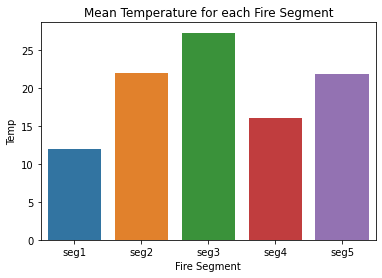

In [ ]:
sns.barplot(summary_df['Fire Segment'], summary_df['Temp Means'])
plt.ylabel('Temp')
plt.title('Mean Temperature for each Fire Segment')

Text(0.5, 1.0, 'Mean X for each Fire Segment')

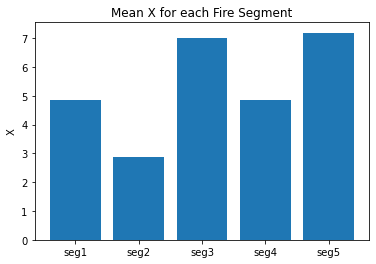

In [ ]:
plt.bar(summary_df['Fire Segment'], summary_df['X Means'])
plt.ylabel('X')
plt.title('Mean X for each Fire Segment')

Text(0.5, 1.0, 'Mean Fine Fuel Moisture Code for each Fire Segment')

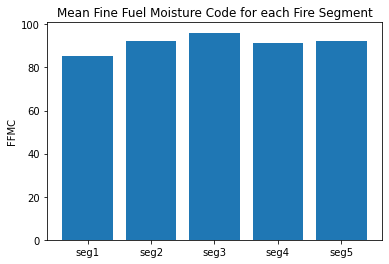

In [ ]:
plt.bar(summary_df['Fire Segment'], summary_df['FFMC Means'])
plt.ylabel('FFMC')
plt.title('Mean Fine Fuel Moisture Code for each Fire Segment')

Text(0.5, 1.0, 'Mean Wind for each Fire Segment')

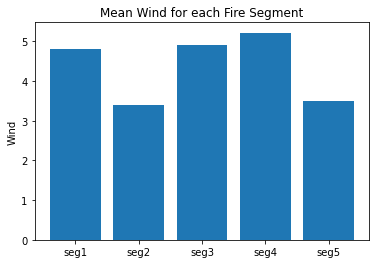

In [ ]:
plt.bar(summary_df['Fire Segment'], summary_df['Wind Means'])
plt.ylabel('Wind')
plt.title('Mean Wind for each Fire Segment')

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,cluster
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,4
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,4
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

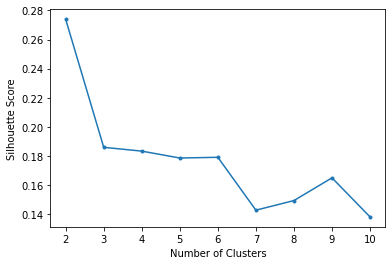

In [ ]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
df['kmeans_cluster'] = kmeans.labels_

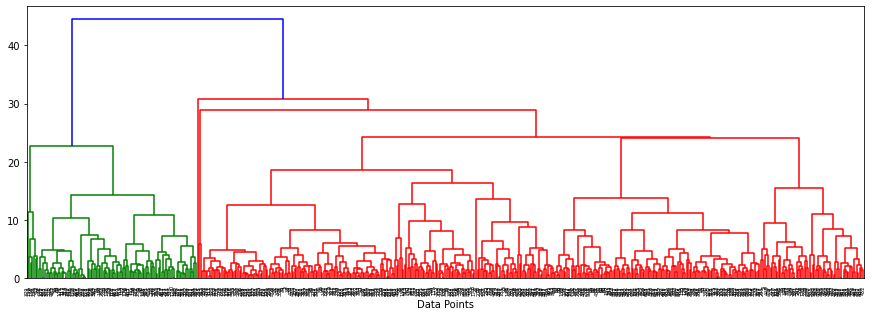

In [ ]:
plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(scaled_df, method = 'ward'))
plt.xlabel('Data Points');

In [ ]:
hc = AgglomerativeClustering(n_clusters = 3)
hc.fit(scaled_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [ ]:
df['hc_cluster'] = hc.labels_

In [ ]:
dbs = DBSCAN(eps = 0.5, min_samples = 5).fit(scaled_df)

In [ ]:
df['dbs_cluster'] = dbs.labels_

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,cluster,kmeans_cluster,hc_cluster,dbs_cluster
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0,0,1,-1
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,4,1,0,-1
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,4,1,0,-1
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0,0,0,-1
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,-1


In [ ]:
# for model in [kmeans, hc, dbs]:
#   print('Silhouette Score for {}: {}'.format(model, silhouette_score(scaled_df, model.labels_)))
#   print('-----------------')

In [ ]:
scaled_df = pd.DataFrame(scaled_df)
scaled_df['labels'] = dbs.labels_
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,labels
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1.008313,0.569860,-1
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,1.008313,-0.244001,-1
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,1.008313,-0.244001,-1
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,1.440925,1.383722,-1
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,1.440925,1.383722,-1


In [ ]:
# scaled_dbs_df = scaled_df.loc[scaled_df['labels'] != -1, :]
# silhouette_score(scaled_dbs_df.drop(columns = 'labels'), scaled_dbs_df['labels'])